# Scratch Notebook

## Pandas Dataframes: Concat instead of Append 

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

soup = BeautifulSoup(data,"html.parser")

#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

# we can see how many tables were found by checking the length of the tables list
print(f"We have {len(tables)} tables.")


We have 25 tables.


We determine the table index of the table =="most densly populated countries"==.

In [4]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

5


Print the HTML tree structure of the table at =="table index"==

In [5]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
 </caption>
 <tbody>
  <tr>
   <th>
    Rank
   </th>
   <th>
    Country
   </th>
   <th>
    Population
   </th>
   <th>
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th>
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapo

In [12]:
import unicodedata

countries = []

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):"https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
        rank = int(col[0].text)
        country = unicodedata.normalize("NFKD", col[1].text).strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        countries.append([rank, country, population, area, density])

countries_df = pd.DataFrame(countries, columns = ['rank', 'country', 'population', 'area', 'density'])
countries_df

,rank,country,population,area,density
0,1,Singapore,"5,704,000",710,"8,033"
1,2,Bangladesh,"173,490,000","143,998","1,205"
2,3,Palestine,"5,266,785","6,020",847
3,4,Lebanon,"6,856,000","10,452",656
4,5,Taiwan,"23,604,000","36,193",652
5,6,South Korea,"51,781,000","99,538",520
6,7,Rwanda,"12,374,000","26,338",470
7,8,Haiti,"11,578,000","27,065",428
8,9,Netherlands,"17,750,000","41,526",427
9,10,Israel,"9,580,000","22,072",434


## Pandas read_html method

In [16]:
# read all HTML tables from speciifc url
url = "https://en.wikipedia.org/wiki/National_Basketball_Association"

basketball_tables = pd.read_html(url)

print(f"There are {len(basketball_tables)} read from the HTML page")

soup = BeautifulSoup(data,"html.parser")

#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

# we can see how many tables were found by checking the length of the tables list
print(f"We have {len(tables)} tables.")


division_table = pd.read_html(url, match="Division")

print(f"There are {len(division_table)} read from the HTML page")
soup = BeautifulSoup(data,"html.parser")

#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

# we can see how many tables were found by checking the length of the tables list
print(f"We have {len(tables)} tables.")


There are 46 read from the HTML page
There are 1 read from the HTML page


In [17]:
df = division_table[0]

list(df)


[('Division', 'Eastern Conference'),
 ('Team', 'Eastern Conference'),
 ('Location', 'Eastern Conference'),
 ('Arena', 'Eastern Conference'),
 ('Capacity', 'Eastern Conference'),
 ('Coordinates', 'Eastern Conference'),
 ('Founded', 'Eastern Conference'),
 ('Joined', 'Eastern Conference'),
 ('Unnamed: 8_level_0', 'Eastern Conference')]

In [18]:
df_final=df.iloc[:,0:3]

df_final.columns = ['Division', 'Team', 'Location']

df_final
soup = BeautifulSoup(data,"html.parser")

#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

# we can see how many tables were found by checking the length of the tables list
print(f"We have {len(tables)} tables.")


,Division,Team,Location
0,Atlantic,Boston Celtics,"Boston, Massachusetts"
1,Atlantic,Brooklyn Nets,"New York City, New York"
2,Atlantic,New York Knicks,"New York City, New York"
3,Atlantic,Philadelphia 76ers,"Philadelphia, Pennsylvania"
4,Atlantic,Toronto Raptors,"Toronto, Ontario"
5,Central,Chicago Bulls,"Chicago, Illinois"
6,Central,Cleveland Cavaliers,"Cleveland, Ohio"
7,Central,Detroit Pistons,"Detroit, Michigan"
8,Central,Indiana Pacers,"Indianapolis, Indiana"
9,Central,Milwaukee Bucks,"Milwaukee, Wisconsin"


# Roche Ticker

In [22]:
import yfinance as yf

In [23]:
roche = yf.Ticker("RHHBY")
roche_info = roche.info
roche_info

{'zip': '4070',
 'sector': 'Healthcare',
 'fullTimeEmployees': 100920,
 'longBusinessSummary': 'Roche Holding AG engages in the pharmaceuticals and diagnostics businesses in Switzerland, Germany, the United States, Austria, Netherlands, the United Kingdom, France, Belgium, and internationally. The company offers pharmaceutical products for treating oncology, neuroscience, infectious, immunology, cardiovascular and metabolism, ophthalmology, and respiratory, as well as anemia, cancer, dermatology, hemophilia, inflammatory and autoimmune, neurological, and transplantation. It also offers in vitro tests for the diagnosis of various diseases, such as cancer, diabetes, Covid-19, hepatitis, human papillomavirus, and other diseases. In addition, the company supplies diagnostic instruments and reagents. It has a research collaboration agreement with Synlogic, Inc. for the discovery of a novel synthetic biotic for the treatment of inflammatory bowel disease (IBD). The company was founded in 189

We can plot the `Open` price against the `Date`:

<AxesSubplot:xlabel='Date'>

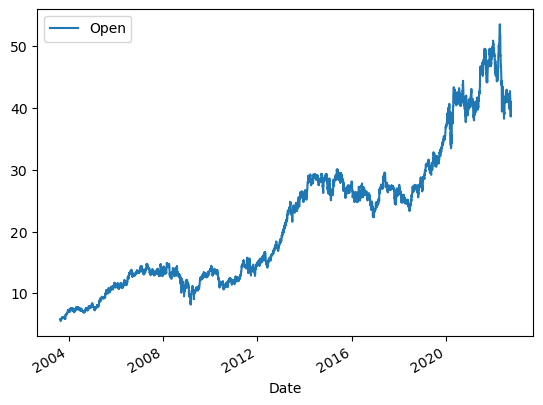

In [25]:
roche_share_price_data = roche.history(period="max")
roche_share_price_data.reset_index(inplace=True)
roche_share_price_data.plot(x="Date", y="Open")

## Paid Dividends

Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.

In [26]:
roche.dividends

Date
2005-02-28    0.21100
2006-02-27    0.23975
2007-03-05    0.34450
2008-03-04    0.52275
2009-03-11    0.53050
2010-03-04    0.69650
2011-03-03    0.85850
2012-03-08    0.92950
2013-03-07    1.01050
2014-03-06    1.09800
2015-03-04    1.08400
2016-03-02    1.03200
2017-03-15    1.01800
2018-03-15    1.11300
2019-03-07    1.09400
2020-03-19    1.15100
2021-03-18    1.27800
2022-03-17    1.26500
Name: Dividends, dtype: float64